## 단순 선형 회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 아버지와 아들의 키 - Galton

In [42]:
df = pd.read_csv("http://www.randomservices.org/random/data/Galton.txt", sep = "\t")
df.head(3)

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4


- 아버지와 아들의 키만 발췌
- columns명을 Father, son으로 변경
- 단위 변경(inch --> centi)

In [43]:
# Filtering과 Selection을 동시에
df = df[df["Gender"] == "M"][["Father", "Height"]]

# 컬럼명 변경
# df.columns = ["Father","son"]
df.rename(columns = {"Height":"Son"}, inplace = True)

# inch를 cm로 바꾸기
df = df * 2.54
# df = df.apply(lambda x: x * 2.54)

df.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


# 산점도 그리기

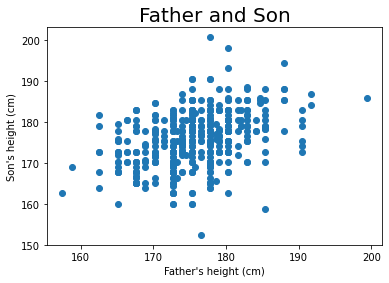

In [45]:
plt.scatter(df.Father, df.Son)
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title("Father and Son", fontsize = 20)
plt.show()

- 회귀선 구하고 그리기
  - np.linalg.lstsq()
  - np.polyfit()

In [52]:
weight, bias = np.polyfit(df.Father, df.Son, 1) # X, Y, 차수

In [53]:
weight, bias

(0.447747917603028, 97.17763700739309)

In [54]:
# 회귀식을 2차식으로
weight, bias = np.polyfit(df.Father, df.Son, 2)

ValueError: ignored

In [55]:
xs = np.array([156, 201])
ys = xs * weight + bias
ys

array([167.02631215, 187.17496845])

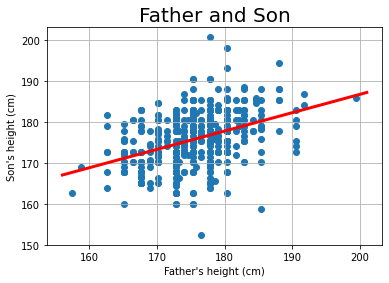

In [56]:
plt.scatter(df.Father, df.Son)
plt.plot(xs, ys, '-r', lw = 3)
plt.grid()
plt.xlabel("Father's height (cm)")
plt.ylabel("Son's height (cm)")
plt.title("Father and Son", fontsize = 20)
plt.show()

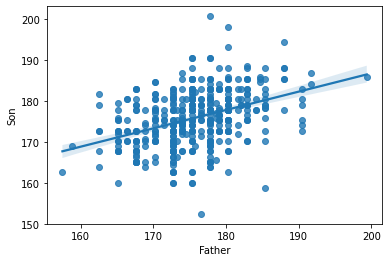

In [57]:
import seaborn as sns
sns.regplot(x = 'Father', y = 'Son', data = df)

- scikit-learn으로 회귀식 구하기

In [58]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [61]:
# 학습 메소드
lr.fit(df[['Father']], df[['Son']])
# lr.fit(df.Father.values.reshape(-1,1), df.Son.values)

LinearRegression()

In [62]:
# coefficient(계수), weight
lr.coef_

array([[0.44774792]])

In [63]:
# intercept(절편), bias
lr.intercept_

array([97.17763701])

In [64]:
# 잔차 제곱의 합(RSS : REsidual Sum of Square)
lr._residues

array([17556.59951549])

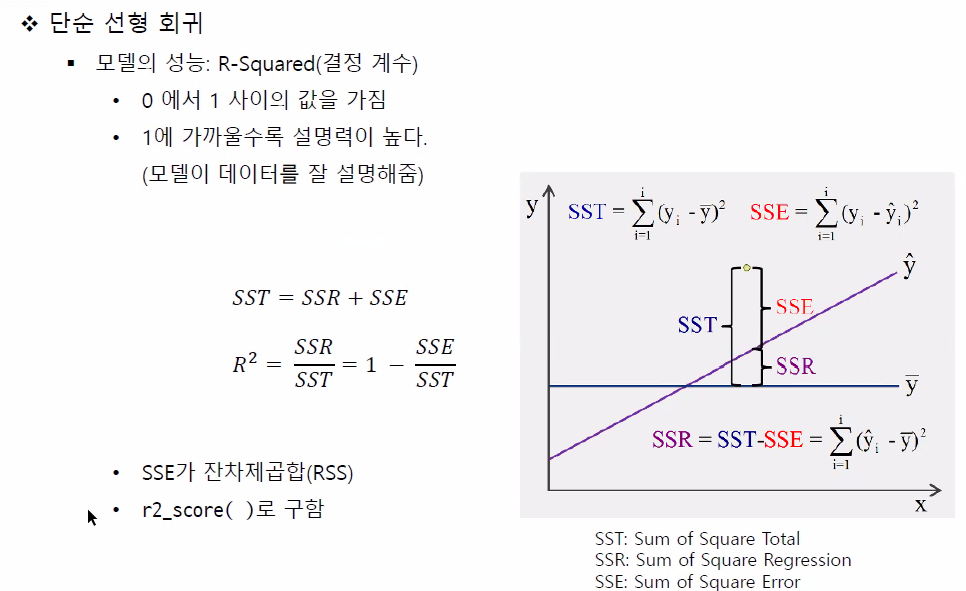

In [65]:
# 평가 - R squared -> 데이터의 분포가 회귀선과 가깝다면 0에 가깝다 
#                     선형회귀선이 얼마나 의미가 있는지 나타내는 지표
lr.score(df[['Father']], df[['Son']])

0.15312927478307048

In [66]:
from sklearn.metrics import r2_score
pred = lr.predict(df[["Father"]])
# 잔차 제곱합을 구해주는 함수(선형회귀식을 평가하는 방법(R2값))
r2_score(df.Son,pred)

0.15312927478307048